# Подготовка данных для машинного обучения

**Выполним обработку датасета "Mental Health in Tech Survey" с Kaggle**







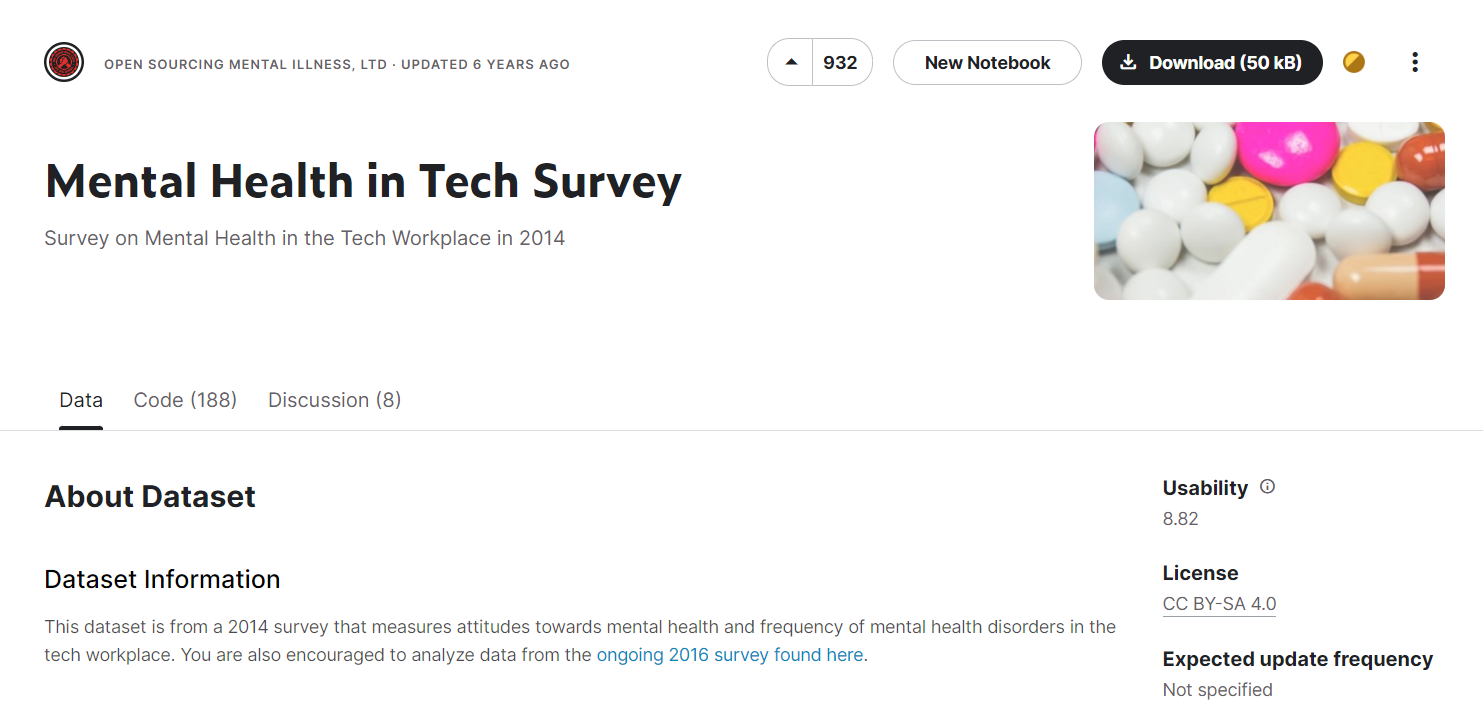

## Наименование признаков рассматриваемого датасета
Timestamp (время)

Age (возраст)

Gender (пол)

Country (страна)

state (штат)

self_employed (самозанятый)

family_history: Есть психические заболевания в вашей семье?

treatment: Обращались ли вы за лечением по поводу психического расстройства?

work_interfere: Если у вас есть проблемы с психическим здоровьем, чувствуете ли вы, что это мешает вашей работе?

no_employees: Сколько сотрудников в вашей компании?

remote_work: 50% рабочего времени вы работаете удаленно?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Характеристики датасета

In [21]:
df.shape # размерность


(1460, 81)

In [22]:
df.info() # покажет информацию о размерности данных
          # описание индекса, количество not-a-number элементов


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

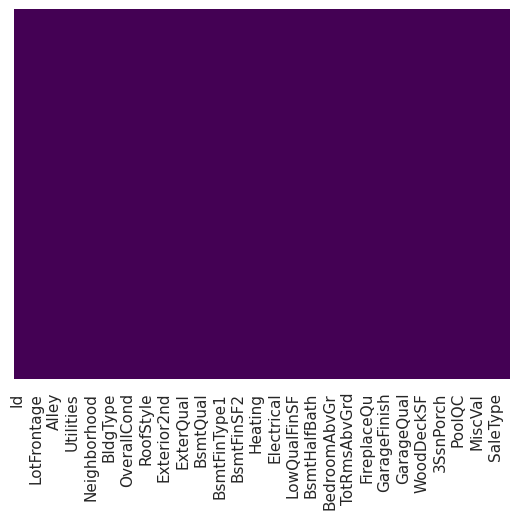

In [59]:
#визуализация отсутствия значений
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
df.describe() # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max
              # только для числовых значений


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
df.nunique() # количество уникальных значений для каждого столбца

,0
Id,1460
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


In [26]:
#количество каждого уникального значения для каждого столбца в наборе данных
feature_names = df.columns.tolist()
for column in feature_names:
    print(column)
    print("----------------------------------")
    print(df[column].value_counts(dropna=False))
    print("==================================")

Id
----------------------------------
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64
MSSubClass
----------------------------------
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning
----------------------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
LotFrontage
----------------------------------
LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 111, dtype: int64
LotArea
----------------------------------
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17

## Выделение целевой переменной
Выбор целевой переменной зависит от решаемой задачи. Например, решаем задачу классификации: Будет ли опрашиваемый человек лечиться

In [36]:
features = df.drop('SalePrice', axis=1)
labels = df['SalePrice']
print(features.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD

## Чистка датасета
Столбец «age» содержит людей, которые еще не родились (отрицательные числа).

Столбец «age» содержит детей (например, 5-летнего возраста), которые вряд ли будут проводить опрос о своем рабочем месте.

Столбец «age» содержит возраст в 99999999999 лет

Существует 49 различных значений для «gender». Для примера, «Male» и «male» обозначают одно и то же, но в рассматриваются как две разные категории.

self_employed и work_interfere содержат несколько пропущенных полей.





### Обработка пропусков данных
Один из способов простых способов решения этой проблемы - просто игнорировать или удалять строки, в которых отсутствуют данные, выбрасывая их из нашего анализа. Однако этот метод может быть плох из-за потери информации.

Еще один способ — это заполнение пропусков, где мы заменяем отсутствующее значение каким-либо образом. Базовые реализации просто заменят все отсутствующие значения средним, медианным, либо же константой.

Для начала необходимо определить что делать с пропущенными значениями, найденными в self_employed и work_interfere. В обоих случаях столбец содержит категориальные данные.

In [37]:
df.fillna(0, inplace=True)

print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave     0      Reg   
1   2          20       RL         80.0     9600   Pave     0      Reg   
2   3          60       RL         68.0    11250   Pave     0      IR1   
3   4          70       RL         60.0     9550   Pave     0      IR1   
4   5          60       RL         84.0    14260   Pave     0      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0      0     0           0       0      2   
1         Lvl    AllPub  ...        0      0     0           0       0      5   
2         Lvl    AllPub  ...        0      0     0           0       0      9   
3         Lvl    AllPub  ...        0      0     0           0       0      2   
4         Lvl    AllPub  ...        0      0     0           0       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Посмотрим на статистику пропусков данных по различным переменным

In [38]:
missing_counts = features.isnull().sum()
missing_counts

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


Посмотрим, что там за данные и какова причина пропусков в столбце state.

In [39]:
features[['LotFrontage', 'MSSubClass', 'LotArea', 'LotShape', 'LandContour', 'MSZoning']][1:20]

,LotFrontage,MSSubClass,LotArea,LotShape,LandContour,MSZoning
1,80.0,20,9600,Reg,Lvl,RL
2,68.0,60,11250,IR1,Lvl,RL
3,60.0,70,9550,IR1,Lvl,RL
4,84.0,60,14260,IR1,Lvl,RL
5,85.0,50,14115,IR1,Lvl,RL
6,75.0,20,10084,Reg,Lvl,RL
7,NaN,60,10382,IR1,Lvl,RL
8,51.0,50,6120,Reg,Lvl,RM
9,50.0,190,7420,Reg,Lvl,RL
10,70.0,20,11200,Reg,Lvl,RL


Совершенно очевидно, что это неслучайные пропуски данных и удалять из-за них строки нецелесообразно.

### Поиск неявных дубликатов

Как упоминалось ранее, для «gender» 49 различных значений, и было подозрение, что некоторые из этих значений не следует рассматривать как разные категории. В конечном итоге для простоты мы разделим данные на 3 категории: мужчина, женщина и другие (сюда вошли те категории, которые можно однозначно исключить из предыдущих двух, для примера - трансгендер).

In [40]:
# Определение словаря соответствий
zonings = {
    'RL': 'Residential',
    'RM': 'Residential',
    'C (all)': 'Commercial',
    'FV': 'Floating Village Residential',
    'RH': 'Residential',
    'RP': 'Residential',
    'A': 'Agriculture',
    'I': 'Industrial',
    'C': 'Commercial'
}

# Функция для очистки данных зонирования
def clean_zoning(response):
    return zonings.get(response, 'Other')

# Применение функции к столбцу 'MSZoning'
features['MSZoning'] = features['MSZoning'].apply(lambda x: clean_zoning(x))

# Печать первых пяти строк данных
print(features.head())


   Id  MSSubClass     MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60  Residential         65.0     8450   Pave   NaN      Reg   
1   2          20  Residential         80.0     9600   Pave   NaN      Reg   
2   3          60  Residential         68.0    11250   Pave   NaN      IR1   
3   4          70  Residential         60.0     9550   Pave   NaN      IR1   
4   5          60  Residential         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0 

### Обнаружение выбросов

Для Age существуют значения, которые кажутся ошибочными. Такие как отрицательный возраст или чрезвычайно большие целые числа, могут негативно повлиять на результат работы алгоритма машинного обучения, и нам нужно будет их устранить.
Для этого возьмем эвристическую оценку, в каком возрасте могут работать люди: от 14 до 100 лет.

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

<ipython-input-42-e53d0fc09c1d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(features['LotArea'].dropna())


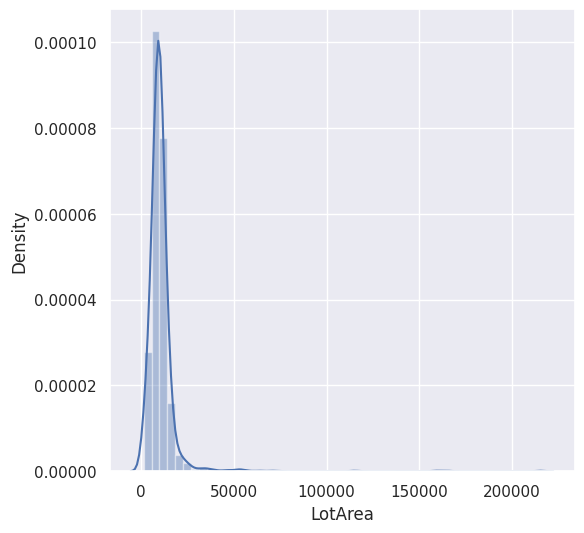

In [42]:
# Визуализация распределения площади участка
sns.set(color_codes=True)
plot = sns.distplot(features['LotArea'].dropna())
plot.figure.set_size_inches(6,6) # в дюймах


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='LotArea'>

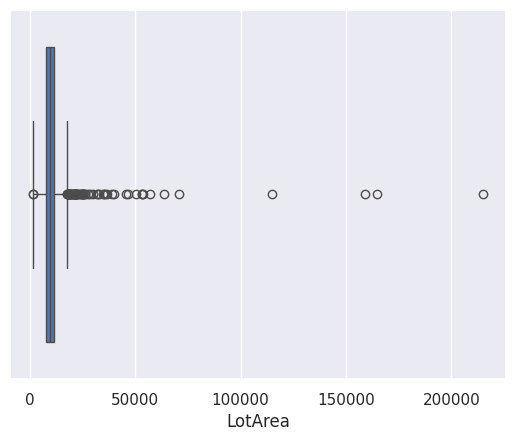

In [43]:
sns.boxplot(x=features['LotArea'].dropna())

Смотрим на масштаб и видим, что есть проблемы.

In [44]:
features.loc[(features.LotArea < 500) | (features.LotArea > 100000), 'LotArea'] = np.nan


<ipython-input-45-f740da933383>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(features.LotArea.dropna())


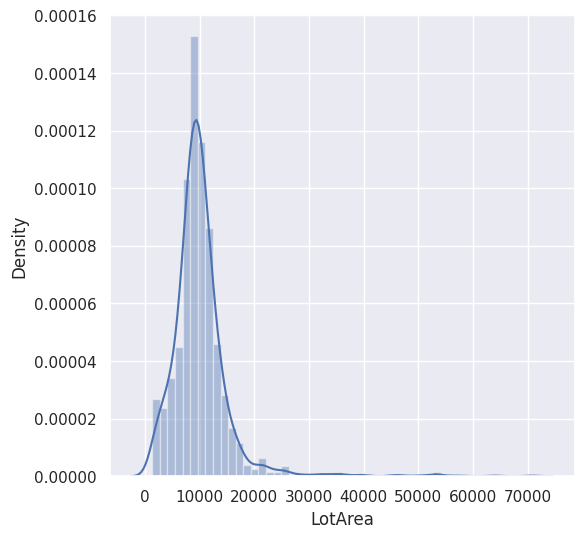

In [45]:
#визуализация распределения возраста
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
plot = sns.distplot(features.LotArea.dropna())
plot.figure.set_size_inches(6,6) # в дюймах

0
70761.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='LotArea'>

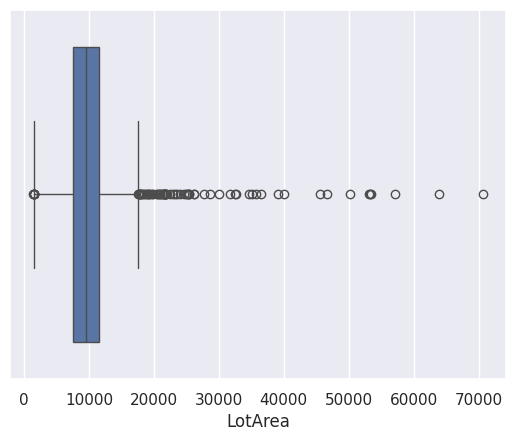

In [46]:
#обработка nan значений, замена их на среднее значение по столбцу
features['LotArea'] = features['LotArea'].fillna(features['LotArea'].mean())
print(features.isnull().sum()['LotArea'])
print(features.LotArea.max())
sns.boxplot(x=features.LotArea.dropna())

### Кодирование данных

Многие алгоритмы машинного обучения ожидают числовые входные данные, поэтому нужно выяснить способ представления категориальных данных численным образом.

Одним из решений этого было бы произвольное присвоение числового значения для каждой категории и отображение набора данных из исходных категорий в каждое соответствующее число. Например, рассмотрим столбец «leave» (как легко вам взять отпуск по болезни для состояния психического здоровья?)

In [47]:
features['MSSubClass'].value_counts(dropna=False)


,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


In [48]:
features['Street'] = df['Street'].map({'Grvl': 0,
                               'Pave': 1})


In [49]:
#автоматическое кодирование
#Проблема с этим подходом заключается в том, что вводится порядок, который может отсутствовать в исходных данных.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(features['Street'])
label_encoder.transform(features['Street'])


array([1, 1, 1, ..., 1, 1, 1])

Для кодирования номинальных данных используется метод one-hot-encoding. Создается столбец для каждого значения и используется 1 и 0 для обозначения выражения каждого значения. Эти новые столбцы часто называются фиктивными переменными.

In [50]:
#автоматическое кодирование
pd.get_dummies(features['Street'])

,0,1
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1455,False,True
1456,False,True
1457,False,True
1458,False,True


### Зависимости в данных
Чтобы каким-либо образом построить модель, желательно исключить взаимозависимости из данных, так как зависимые друг от друга переменные, как минимум увеличивают вычислительные затраты, а порой и мешают построению качественной модели

Прежде чем задаваться вопросом исключения лишних переменных, надо узнать, а как вообще обстоят дела с зависимостью. Нам поможет в этом библиотека seaborn.

                 Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
Id             1.00        0.01        -0.02    -0.03        -0.03   
MSSubClass     0.01        1.00        -0.22    -0.14         0.03   
LotFrontage   -0.02       -0.22         1.00     0.10         0.18   
LotArea       -0.03       -0.14         0.10     1.00         0.11   
OverallQual   -0.03        0.03         0.18     0.11         1.00   
OverallCond    0.01       -0.06        -0.05    -0.01        -0.09   
YearBuilt     -0.01        0.03         0.04     0.01         0.57   
YearRemodAdd  -0.02        0.04         0.08     0.01         0.55   
MasVnrArea    -0.05        0.02         0.11     0.10         0.41   
BsmtFinSF1    -0.01       -0.07         0.08     0.21         0.24   
BsmtFinSF2    -0.01       -0.07        -0.01     0.11        -0.06   
BsmtUnfSF     -0.01       -0.14         0.16    -0.00         0.31   
TotalBsmtSF   -0.02       -0.24         0.24     0.26         0.54   
1stFlrSF       0.01 

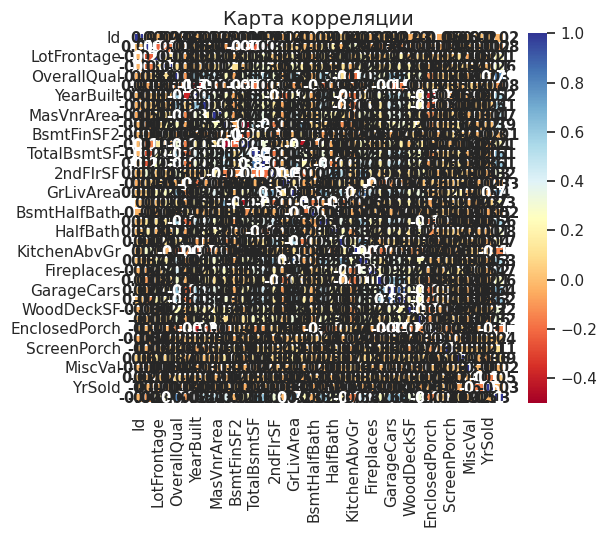

In [55]:
var_corr = round(features.corr(numeric_only=True),2)
print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("RdYlBu")
                , linewidths=.1)
plt.title('Карта корреляции', fontsize=14)
plt.show()
# plt.colormaps() -  так можно посмотреть доступные цветовые карты

### Нормализация данных

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

**Нормализация на стандартное отклонение (StandartScaler)** - используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.

**Нормализация Min-max** устанавливает наименьшее наблюдаемое значение равным 0, а наибольшее наблюдаемое значение — 1.


In [56]:
from sklearn.preprocessing import StandardScaler

# Создаем экземпляр StandardScaler
scale_features_std = StandardScaler()

# Выбираем столбец для нормализации, в данном случае 'LotArea'
features['LotArea'] = scale_features_std.fit_transform(features[['LotArea']])

# Печатаем первые 5 строк вашего DataFrame, чтобы увидеть результаты
print(features.head())


   Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0 -0.207142            7            5       2003   
1   2          20         80.0 -0.091886            6            8       1976   
2   3          60         68.0  0.073480            7            5       2001   
3   4          70         60.0 -0.096897            7            5       1915   
4   5          60         84.0  0.375148            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSol

In [57]:
#нормализация Min-max
features["LotArea"] = df["LotArea"]
features['LotArea'] = features['LotArea'].fillna(features['LotArea'].mean())
print(features.head())

from sklearn.preprocessing import MinMaxScaler
scale_features_mm = MinMaxScaler()
features[["LotArea"]] = scale_features_mm.fit_transform(features[["LotArea"]])
print(features.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

### Разделение данных для обучения и тестирования
Разделение данных на обучающую и тестовую выборку. Выделение тестовой выборки необходимо для понимания того, что модель обучена в достаточной степени (не произошло переобучение или недообучение)

In [58]:
from sklearn.model_selection import train_test_split
import pandas as pd

features = df.drop('SalePrice', axis=1)
labels = df['SalePrice']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0)

print(features.shape)
print(features_train.shape)
print(features_test.shape)


(1460, 80)
(1168, 80)
(292, 80)


## **Задание**
1. Выполнить обработку одного из наборов данных:
- отток клиентов кабельного оператора (customers.csv)
- отток клиентов телекоммуникационного оператора (telecom_churn.csv)
- цены на недвижимость (данные и их описание находятся в архиве HousePices.zip)
- цены на автомобили (auto_sales.xls)
2. Выполнить операции анализа и предобработки датасета для заданного датасета

#### Вариант задания:
- студенты, чей номер по списку делится на 4 без остатка, работают с customers.csv
- студенты, чей номер по списку делится на 4 с остатком 1, работают с telecom_churn.csv
- студенты, чей номер по списку делится на 4 с остатком 2, работают с HousePrices.zip
- студенты, чей номер по списку делится на 4 с остатком 3, работают с auto_sales.xls

**Задание**


---


Вариант - с остатком 2, работаю c HousePrices

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Выбираем столбец SalePrice
prices = df['SalePrice']

# Просматриваем информацию о ценах
print(prices.info())

# Просматриваем первые 5 строк цен
print(prices.head(100))

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64


In [ ]:
# Рассчитываем среднюю цену на недвижимость
mean_price = prices.mean()

print(f'Средняя цена на недвижимость: {mean_price:.2f}')


Средняя цена на недвижимость: 180921.20
